In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Path to your dataset
root_dir = 'multi-cancer/Flattened'

# Load the training dataset (80% of the data)
train_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir,
    labels="inferred",
    label_mode="categorical",  # Categorical for multi-class classification
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=123,                 # Seed for reproducibility
    validation_split=0.2,     # 20% of the data will be used for validation
    subset="training"         # Use this subset for training
)


Found 130002 files belonging to 26 classes.
Using 104002 files for training.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir,
    labels="inferred",
    label_mode="categorical",  # Categorical for multi-class classification
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=123,                 # Same seed to ensure the split is consistent
    validation_split=0.2,     # Same 20% split for validation
    subset="validation"       # Use this subset for validation
)


Found 130002 files belonging to 26 classes.
Using 26000 files for validation.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
cnn.add(tf.keras.layers.Dense(units=26,activation='softmax'))

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=train_ds,validation_data=val_ds,epochs=7)

Epoch 1/7
6501/6501 [==============================] - 490s 74ms/step - loss: 0.7099 - accuracy: 0.7296 - val_loss: 0.2864 - val_accuracy: 0.8913
Epoch 2/7
6501/6501 [==============================] - 467s 72ms/step - loss: 0.2729 - accuracy: 0.8974 - val_loss: 0.1751 - val_accuracy: 0.9321
Epoch 3/7
6501/6501 [==============================] - 483s 74ms/step - loss: 0.1855 - accuracy: 0.9304 - val_loss: 0.1560 - val_accuracy: 0.9423
Epoch 4/7
6501/6501 [==============================] - 486s 75ms/step - loss: 0.1389 - accuracy: 0.9486 - val_loss: 0.1296 - val_accuracy: 0.9542
Epoch 5/7
6501/6501 [==============================] - 498s 77ms/step - loss: 0.1082 - accuracy: 0.9609 - val_loss: 0.1073 - val_accuracy: 0.9600
Epoch 6/7
6501/6501 [==============================] - 517s 79ms/step - loss: 0.0895 - accuracy: 0.9682 - val_loss: 0.0898 - val_accuracy: 0.9669
Epoch 7/7
6501/6501 [==============================] - 513s 79ms/step - loss: 0.0738 - accuracy: 0.9743 - val_loss: 0.0775 -

In [18]:
cnn.save('cance_cnn.h5')

In [19]:
cnn.save('cancer_cnn.keras')

In [20]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(train_ds)
print('Training accuracy:', train_acc)

6501/6501 [==============================] - 203s 31ms/step - loss: 0.0474 - accuracy: 0.9831
Training accuracy: 0.9831157326698303


In [27]:
import os
import shutil
import random
from math import floor

# Paths to the dataset
original_dataset_dir = 'multi-cancer/Flattened'
test_dataset_dir = 'multi-cancer/Test_Dataset'

# Create the test dataset directory if it doesn't exist
if not os.path.exists(test_dataset_dir):
    os.makedirs(test_dataset_dir)

# Iterate through each class folder
for cancer_type in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, cancer_type)
    
    # Skip if it's not a directory
    if not os.path.isdir(class_dir):
        continue
    
    # Create a corresponding class directory in the test dataset
    test_class_dir = os.path.join(test_dataset_dir, cancer_type)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # Get all images in the class directory
    images = os.listdir(class_dir)
    
    # Shuffle and select 20% of the images
    random.shuffle(images)
    num_test_images = floor(len(images) * 0.2)
    test_images = images[:num_test_images]
    
    # Copy the selected images to the test dataset directory
    for image in test_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(test_class_dir, image)
        shutil.copy(src, dst)

print("Test dataset created successfully by copying files!")


Test dataset created successfully by copying files!


In [28]:
val_loss, val_acc = cnn.evaluate(val_ds)
print('Validation accuracy:', val_acc)

1625/1625 [==============================] - 49s 30ms/step - loss: 0.0775 - accuracy: 0.9716
Validation accuracy: 0.9716153740882874


In [29]:
training_history.history #Return Dictionary of history

{'loss': [0.7098627686500549,
  0.27293068170547485,
  0.18545158207416534,
  0.1389351189136505,
  0.10820987820625305,
  0.08951178193092346,
  0.07381228357553482],
 'accuracy': [0.7296109795570374,
  0.8973769545555115,
  0.9304147958755493,
  0.9485875368118286,
  0.9609334468841553,
  0.9681544303894043,
  0.9742600917816162],
 'val_loss': [0.2863863706588745,
  0.17505429685115814,
  0.15595471858978271,
  0.1295623928308487,
  0.10727783292531967,
  0.08984983712434769,
  0.07751599699258804],
 'val_accuracy': [0.8912692070007324,
  0.932115375995636,
  0.9422692060470581,
  0.9541922807693481,
  0.9599999785423279,
  0.9669230580329895,
  0.9716153740882874]}

In [30]:

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


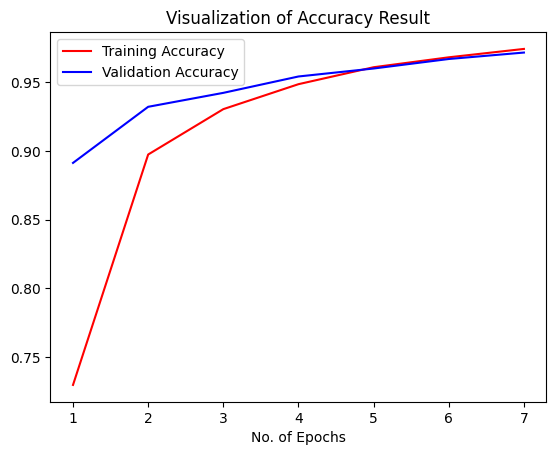

In [33]:
epochs = [i for i in range(1,8)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [35]:
class_name = val_ds.class_names

In [37]:
class_name

['Acute Lymphoblastic Leukemia (ALL) - Benign Cases',
 'Acute Lymphoblastic Leukemia (ALL) - Early Stage',
 'Acute Lymphoblastic Leukemia (ALL) - Pre-Treatment',
 'Acute Lymphoblastic Leukemia (ALL) - Progressed Cases',
 'Brain Cancer - General Tumor',
 'Brain Cancer - Glioma',
 'Brain Cancer - Meningioma',
 'Breast Cancer - Benign',
 'Breast Cancer - Malignant',
 'Cervical Cancer - Abnormal Pap Results',
 'Cervical Cancer - Dyskaryosis',
 'Cervical Cancer - Keratinized Cells',
 'Cervical Cancer - Pre-Cancerous Cells',
 'Cervical Cancer - Specific Forms',
 'Kidney Cancer - Normal Tissue',
 'Kidney Cancer - Tumor',
 'Lung and Colon Cancer - Benign Colon Conditions',
 'Lung and Colon Cancer - Benign Lung Conditions',
 'Lung and Colon Cancer - Colon Adenocarcinoma',
 'Lung and Colon Cancer - Lung Adenocarcinoma',
 'Lung and Colon Cancer - Lung Squamous Cell Carcinoma',
 'Lymphoma - Chronic Lymphocytic Leukemia',
 'Lymphoma - Follicular Lymphoma',
 'Lymphoma - Mantle Cell Lymphoma',
 'Oral

In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'multi-cancer/Test_Dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 26000 files belonging to 26 classes.


In [39]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

26000/26000 [==============================] - 173s 7ms/step


In [42]:
predicted_categories

<tf.Tensor: shape=(26000,), dtype=int64, numpy=array([ 0,  0,  0, ..., 25, 24, 25], dtype=int64)>

In [40]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [41]:
Y_true

<tf.Tensor: shape=(26000,), dtype=int64, numpy=array([ 0,  0,  0, ..., 25, 25, 25], dtype=int64)>

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [44]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                       precision    recall  f1-score   support

    Acute Lymphoblastic Leukemia (ALL) - Benign Cases       0.99      1.00      1.00      1000
     Acute Lymphoblastic Leukemia (ALL) - Early Stage       1.00      0.99      1.00      1000
   Acute Lymphoblastic Leukemia (ALL) - Pre-Treatment       1.00      1.00      1.00      1000
Acute Lymphoblastic Leukemia (ALL) - Progressed Cases       1.00      1.00      1.00      1000
                         Brain Cancer - General Tumor       0.99      0.99      0.99      1000
                                Brain Cancer - Glioma       1.00      0.98      0.99      1000
                            Brain Cancer - Meningioma       0.97      0.99      0.98      1000
                               Breast Cancer - Benign       0.98      0.92      0.95      1000
                            Breast Cancer - Malignant       0.93      0.98      0.95      1000
               Cervical Cancer - Abnormal Pap Res

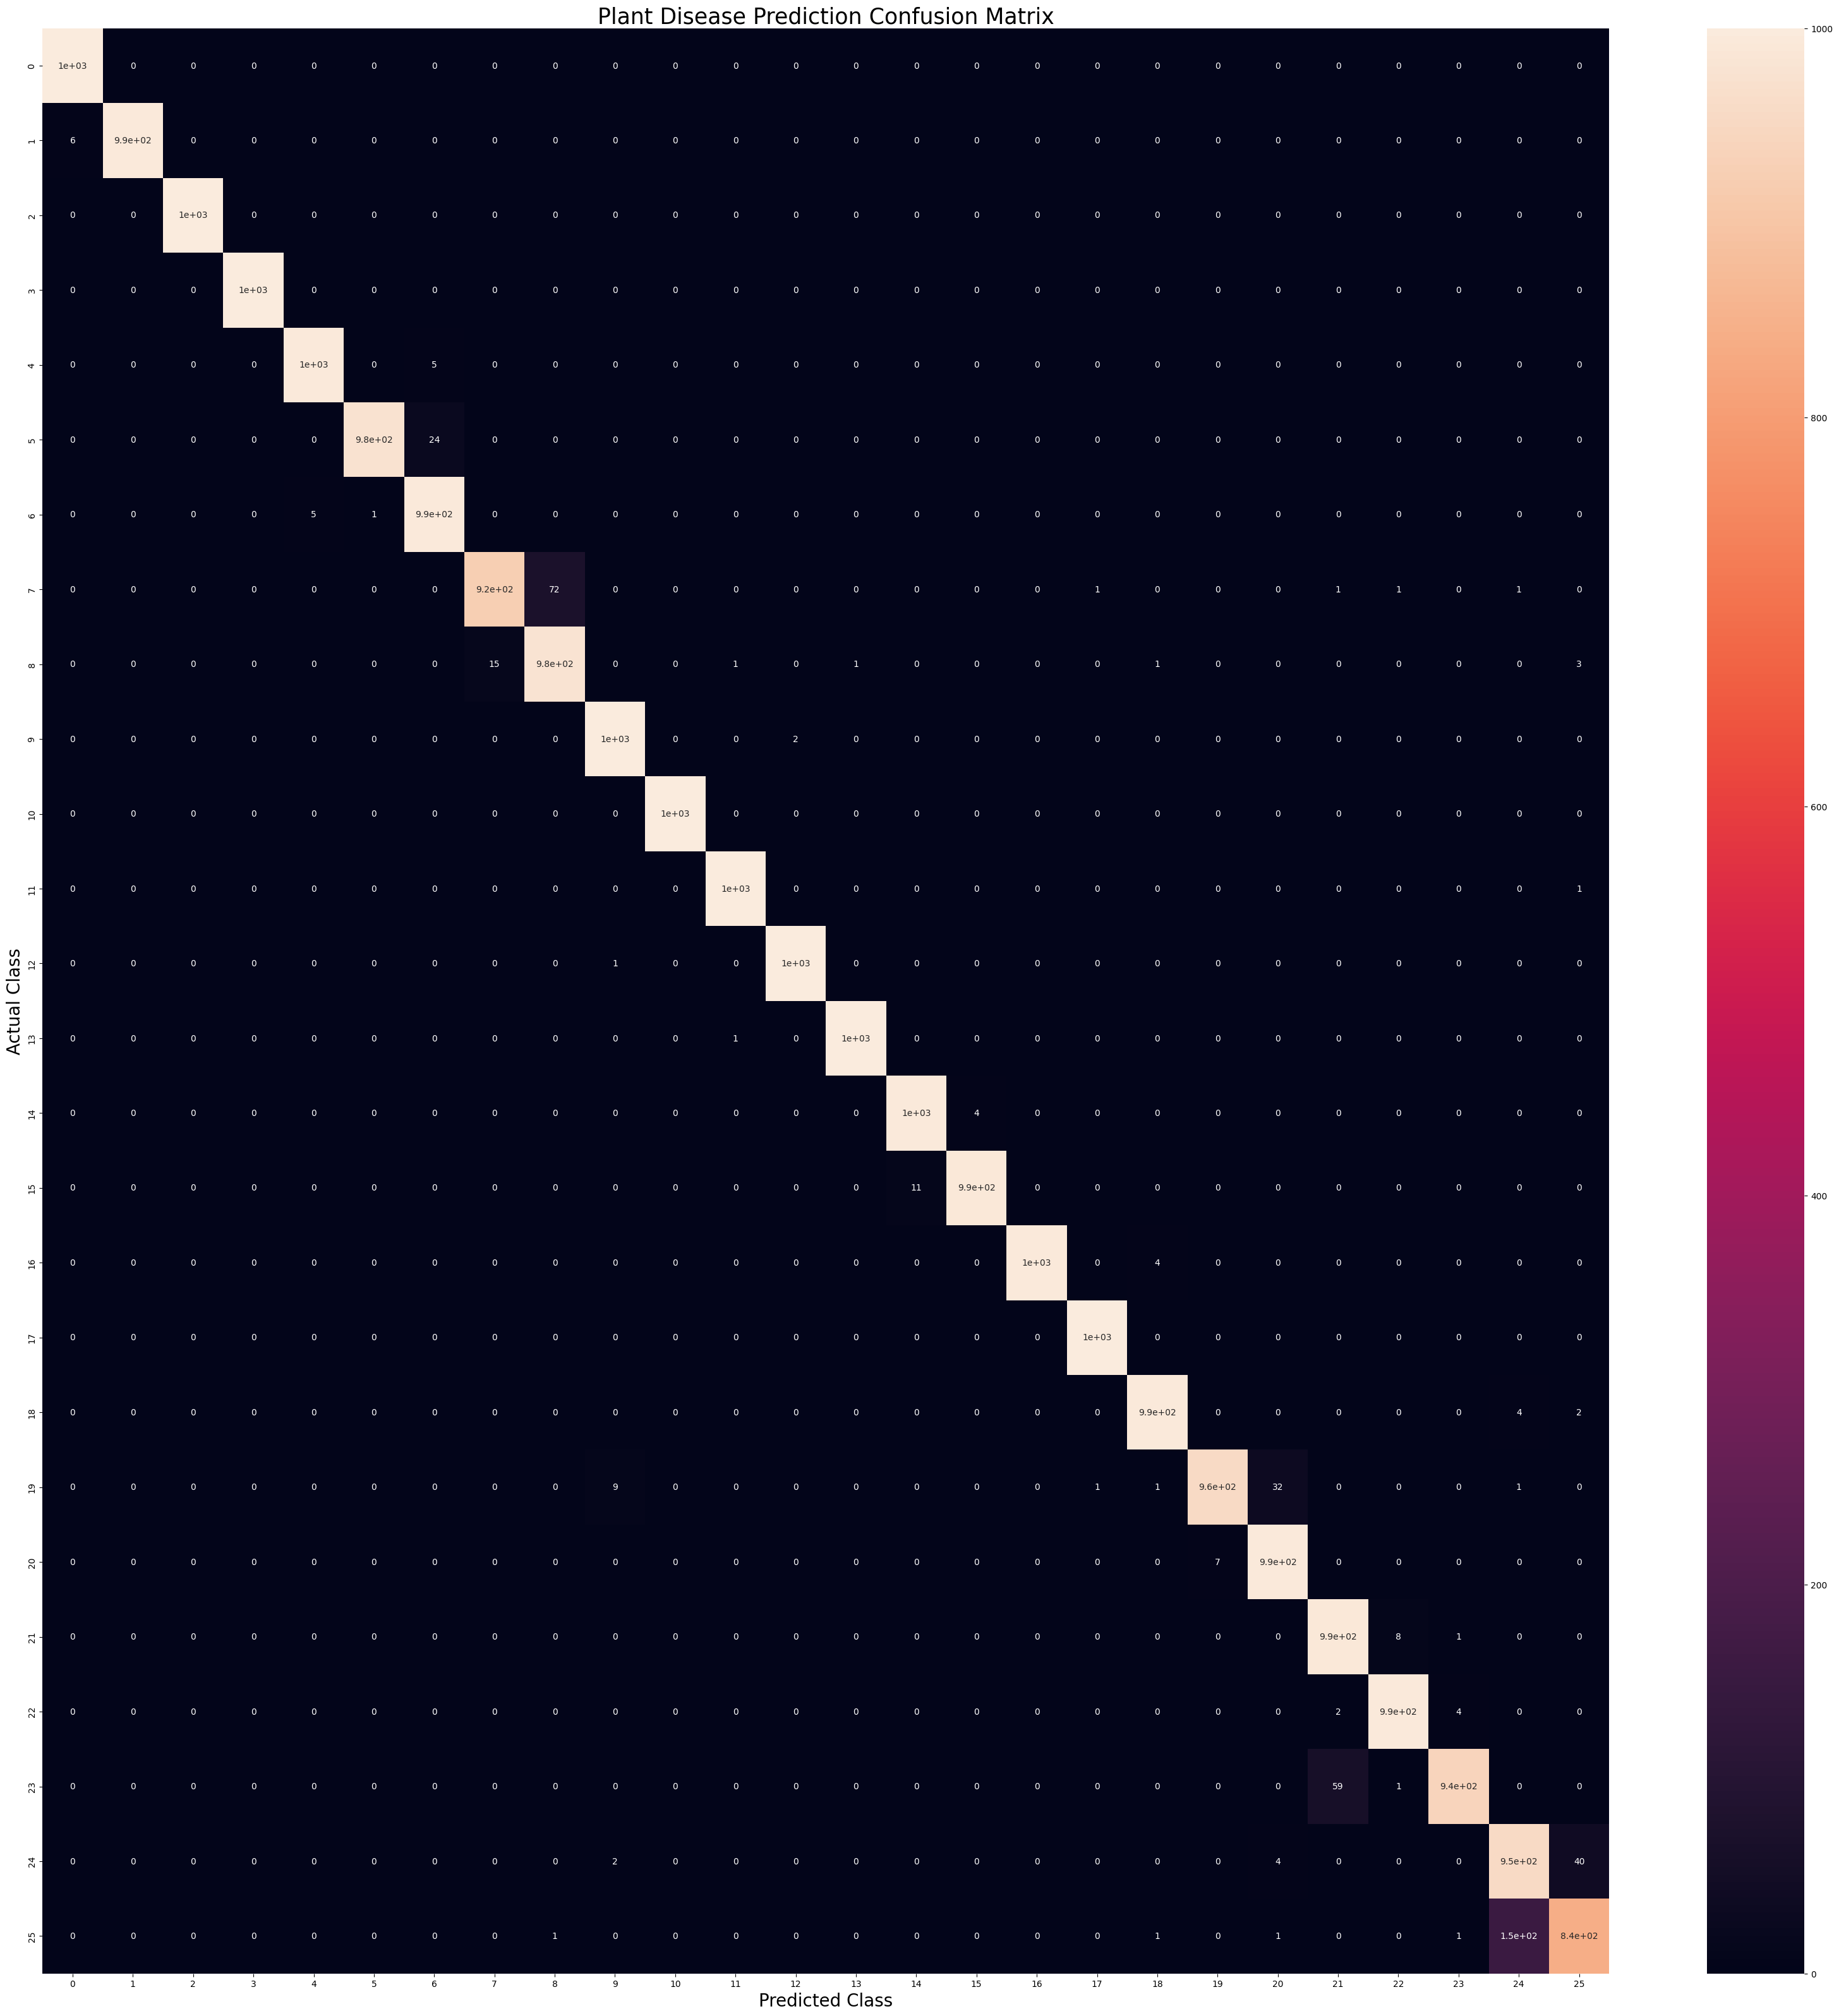

In [45]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()